In [1]:
import sys
assert sys.version_info >= (3, 5)
import sklearn
assert sklearn.__version__ >= "0.20"
import numpy as np
import os

np.random.seed(42)

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

PROJECT_ROOT_DIR = "."
CHAPTER_ID = "classification"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [3]:
X, y = mnist["data"], mnist["target"]

In [4]:
y = y.astype(np.uint8)

In [5]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [47]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(weights='distance', n_neighbors=4)
knn_clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4, weights='distance')

In [48]:
y_knn_pred = knn_clf.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_knn_pred)

0.9714

In [67]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(n_estimators=100)
forest_clf.fit(X_train, y_train)

y_forest_pred = forest_clf.predict(X_test)
accuracy_score(y_test, y_forest_pred)

0.9697

In [68]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)
sgd_clf.fit(X_train, y_train)

y_sgd_pred = sgd_clf.predict(X_test)
accuracy_score(y_test, y_sgd_pred)

0.874

In [40]:
from sklearn.svm import SVC
svm_clf = SVC(kernel="poly", C=10,coef0 = 0.5,degree = 4)
svm_clf.fit(X_train, y_train)
y_pred_svc = svm_clf.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred_svc)

0.983

In [73]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

print(accuracy_score(y_test, y_pred_svc) * 100)
print(precision_score(y_test, y_pred_svc, average='weighted') * 100)
print(recall_score(y_test, y_pred_svc, average='weighted')* 100)
print(f1_score(y_test, y_pred_svc, average='weighted')* 100)

98.3
98.30049493949383
98.3
98.29928983271692


In [74]:
print(accuracy_score(y_test, y_knn_pred) * 100)
print(precision_score(y_test, y_knn_pred, average='weighted')* 100)
print(recall_score(y_test, y_knn_pred, average='weighted')* 100)
print(f1_score(y_test, y_knn_pred, average='weighted')* 100)

97.14
97.15166824529756
97.14
97.13597782738583


In [75]:
print(accuracy_score(y_test, y_forest_pred) * 100)
print(precision_score(y_test, y_forest_pred, average='weighted')* 100)
print(recall_score(y_test, y_forest_pred, average='weighted')* 100)
print(f1_score(y_test, y_forest_pred, average='weighted')* 100)

96.97
96.97196706394361
96.97
96.9690174670664


In [76]:
print(accuracy_score(y_test, y_sgd_pred) * 100)
print(precision_score(y_test, y_sgd_pred, average='weighted')* 100)
print(recall_score(y_test, y_sgd_pred, average='weighted')* 100)
print(f1_score(y_test, y_sgd_pred, average='weighted')* 100)

87.4
88.82010761983187
87.4
87.66634064046592


2 2 99.53121376037598
3 3 109.64929556846619
4 4 113.93196606636047
5 5 133.7556915283203


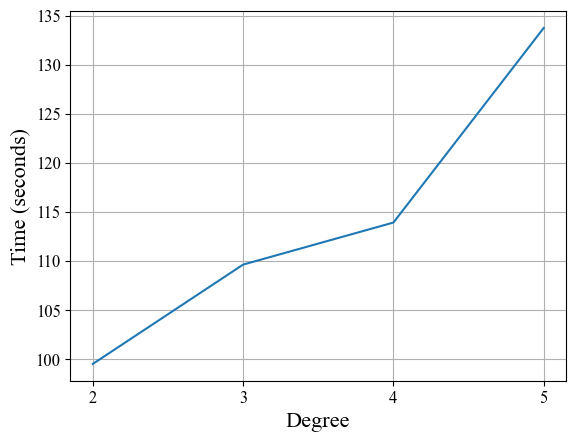

In [84]:
import time


deg = []
times = []
for i in range(2,6):
    svm_clf = SVC(kernel="poly", C=5, coef0=0.1, degree = i)
    t1 = time.time()
    svm_clf.fit(X_train, y_train)
    t2 = time.time()
    times.append(t2-t1)
    deg.append(i)
    print(i, i, t2-t1)
plt.rcParams['font.family'] = 'Times New Roman'
plt.plot(deg, times)
plt.xticks([2,3,4,5])
plt.xlabel("Degree", fontsize=16)
plt.ylabel("Time (seconds)", fontsize=16)
plt.grid(True)
plt.show()

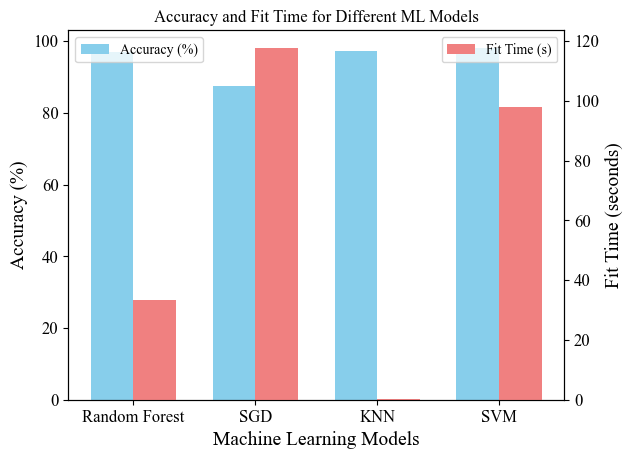

In [82]:
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import time

models = {
    'Random Forest': RandomForestClassifier(n_estimators=100),
    'SGD':SGDClassifier(max_iter=1000, tol=1e-3, random_state=42),
    'KNN': KNeighborsClassifier(weights='distance', n_neighbors=4),
    'SVM': SVC(kernel="poly", C=5,coef0 = 0.1,degree = 2)
}

fit_times = []
accuracies = []
model_names = []

for model_name, model in models.items():
    start_time = time.time()
    model.fit(X_train, y_train)
    end_time = time.time()

    fit_time = end_time - start_time
    fit_times.append(fit_time)

    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred) * 100 
    accuracies.append(accuracy)
    model_names.append(model_name)


x = np.arange(len(models))
width = 0.35 
fig, ax1 = plt.subplots()

bars1 = ax1.bar(x - width/2, accuracies, width, label='Accuracy (%)', color='skyblue')

ax2 = ax1.twinx()
bars2 = ax2.bar(x + width/2, fit_times, width, label='Fit Time (s)', color='lightcoral')
plt.rcParams['font.family'] = 'Times New Roman'
ax1.set_xlabel('Machine Learning Models')
ax1.set_ylabel('Accuracy (%)')
ax2.set_ylabel('Fit Time (seconds)')
ax1.set_title('Accuracy and Fit Time for Different ML Models')

ax1.set_xticks(x)
ax1.set_xticklabels(model_names)

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()

In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier

models = {
    'Linear': SVC(kernel='linear', C = 10),
    'Poly':SVC(kernel="poly", C=10,coef0 = 0.5,degree = 4),
    'RBF':SVC(kernel="rbf", C=10,gamma = 0.1)
}

fit_times = []
accuracies = []
model_names = []

for model_name, model in models.items():
    start_time = time.time()
    model.fit(X_train, y_train)
    end_time = time.time()

    fit_time = end_time - start_time
    fit_times.append(fit_time)

    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred) * 100 
    accuracies.append(accuracy)
    model_names.append(model_name)


x = np.arange(len(models))
width = 0.35
fig, ax1 = plt.subplots()

bars1 = ax1.bar(x - width/2, accuracies, width, label='Accuracy (%)', color='skyblue')

ax2 = ax1.twinx()
bars2 = ax2.bar(x + width/2, fit_times, width, label='Fit Time (s)', color='lightcoral')

ax1.set_xlabel('Kernel')
ax1.set_ylabel('Accuracy (%)')
ax2.set_ylabel('Fit Time (seconds)')
ax1.set_title('Accuracy and Fit Time for Different Ks')

ax1.set_xticks(x)
ax1.set_xticklabels(model_names)

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()

In [ ]:
from sklearn.svm import SVC
import time
svm_clf = SVC(kernel="rbf", C=10,gamma = 0.1)
start_time = time.time()
svm_clf.fit(X_train, y_train)
end_time = time.time()
print(end_time-start_time)
y_pred_svc = svm_clf.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred_svc)

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float32))
X_test_scaled = scaler.transform(X_test.astype(np.float32))

In [9]:
from sklearn.svm import SVC
svm_clf = SVC(C=3.8786881587000437, gamma=0.0017076019229344522)
svm_clf.fit(X_train_scaled[:10000], y_train[:10000])
y_pred = svm_clf.predict(X_train_scaled)
accuracy_score(y_train, y_pred)

0.9541666666666667

In [8]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train, y_pred)

0.9427166666666666

In [10]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import reciprocal, uniform

param_distributions = {"gamma": reciprocal(0.001, 0.1), "C": uniform(1, 10)}
rnd_search_cv = RandomizedSearchCV(svm_clf, param_distributions, n_iter=10, verbose=2, cv=3)
rnd_search_cv.fit(X_train_scaled[:1000], y_train[:1000])

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END ....C=10.50714306409916, gamma=0.029106359131330698; total time=   0.1s
[CV] END ....C=10.50714306409916, gamma=0.029106359131330698; total time=   0.1s
[CV] END ....C=10.50714306409916, gamma=0.029106359131330698; total time=   0.1s
[CV] END ...C=6.986584841970366, gamma=0.0020513382630874496; total time=   0.1s
[CV] END ...C=6.986584841970366, gamma=0.0020513382630874496; total time=   0.1s
[CV] END ...C=6.986584841970366, gamma=0.0020513382630874496; total time=   0.1s
[CV] END ..C=2.5599452033620267, gamma=0.0013066739238053278; total time=   0.0s
[CV] END ..C=2.5599452033620267, gamma=0.0013066739238053278; total time=   0.0s
[CV] END ..C=2.5599452033620267, gamma=0.0013066739238053278; total time=   0.0s
[CV] END ....C=9.661761457749352, gamma=0.015930522616241012; total time=   0.1s
[CV] END ....C=9.661761457749352, gamma=0.015930522616241012; total time=   0.1s
[CV] END ....C=9.661761457749352, gamma=0.015930

RandomizedSearchCV(cv=3,
                   estimator=SVC(C=3.8786881587000437,
                                 gamma=0.0017076019229344522),
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000002CFEB544620>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000002CFECEB5370>},
                   verbose=2)

In [11]:
rnd_search_cv.best_estimator_

SVC(C=np.float64(8.080725777960454), gamma=np.float64(0.0010994335574766201))

In [12]:
rnd_search_cv.best_score_

np.float64(0.8619907332482183)

In [13]:
rnd_search_cv.best_estimator_.fit(X_train_scaled, y_train)

SVC(C=np.float64(8.080725777960454), gamma=np.float64(0.0010994335574766201))

In [14]:
y_pred = rnd_search_cv.best_estimator_.predict(X_train_scaled)
accuracy_score(y_train, y_pred)

0.998

In [15]:
y_pred = rnd_search_cv.best_estimator_.predict(X_test_scaled)
accuracy_score(y_test, y_pred)

0.973

In [23]:
from sklearn.model_selection import GridSearchCV
param_grid = {'kernel':['linear'] ,'C':[1, 2, 3 , 4, 5]}
grid_search = GridSearchCV(SVC(), param_grid, cv=5,verbose=3)
grid_search.fit(X_train_scaled[:1000], y_train[:1000])

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV 1/5] END ................C=1, kernel=linear;, score=0.880 total time=   0.0s
[CV 2/5] END ................C=1, kernel=linear;, score=0.860 total time=   0.0s
[CV 3/5] END ................C=1, kernel=linear;, score=0.870 total time=   0.0s
[CV 4/5] END ................C=1, kernel=linear;, score=0.870 total time=   0.0s
[CV 5/5] END ................C=1, kernel=linear;, score=0.830 total time=   0.0s
[CV 1/5] END ................C=2, kernel=linear;, score=0.880 total time=   0.0s
[CV 2/5] END ................C=2, kernel=linear;, score=0.860 total time=   0.0s
[CV 3/5] END ................C=2, kernel=linear;, score=0.870 total time=   0.0s
[CV 4/5] END ................C=2, kernel=linear;, score=0.870 total time=   0.0s
[CV 5/5] END ................C=2, kernel=linear;, score=0.830 total time=   0.0s
[CV 1/5] END ................C=3, kernel=linear;, score=0.880 total time=   0.0s
[CV 2/5] END ................C=3, kernel=linear;,

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 2, 3, 4, 5], 'kernel': ['linear']},
             verbose=3)

In [24]:
grid_search.best_estimator_

SVC(C=1, kernel='linear')

In [25]:
grid_search.best_score_

np.float64(0.8619999999999999)

In [26]:
grid_search.best_estimator_.fit(X_train_scaled, y_train)

SVC(C=1, kernel='linear')

In [27]:
y_pred = grid_search.best_estimator_.predict(X_train_scaled)
accuracy_score(y_train, y_pred)

0.9821

In [30]:
y_pred = grid_search.best_estimator_.predict(X_test_scaled)
accuracy_score(y_test, y_pred)

0.9293

In [ ]:
param_grid = {'kernel':['poly'] ,'C':[1, 2, 3 , 4, 5],'degree':[2,3,4,5],'coef0':[0.1,0.3,0.5]}
grid_search = GridSearchCV(SVC(), param_grid, cv=5,verbose=3)
grid_search.fit(X_train_scaled[:1000], y_train[:1000])

In [33]:
grid_search.best_estimator_

SVC(C=5, coef0=0.1, degree=2, kernel='poly')

In [34]:
grid_search.best_score_

np.float64(0.889)

In [64]:
from sklearn.model_selection import GridSearchCV
import numpy as np
from sklearn.svm import SVC

param = [
    {
        'kernel' : ['linear'],
        'C':[1,5,10]
    },
    {
        'kernel' : ['poly'],
        'C':[1,5,10],
        'degree' : [2,3,6],
        'coef0':[0,0.5,1]
    },
    {
        'kernel' : ['rbf'],
        'C':[1,5,10],
        'gamma' : [0.001,0.01,0.1]}
]

svc_search = GridSearchCV(SVC(), param, cv=5, scoring="accuracy", verbose = 3, n_jobs=-1)
svc_search.fit(X_train_scaled[:10000], y_train[:10000])
svc_best_param = {"SVM" : svc_search.best_params_}
svc_best = svc_search.best_estimator_

Fitting 5 folds for each of 39 candidates, totalling 195 fits


C:\Users\morga\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [65]:
svc_search.best_score_

np.float64(0.9551000000000001)

In [66]:
grid_search.best_estimator_

SVC(C=5, coef0=0.1, degree=2, kernel='poly')

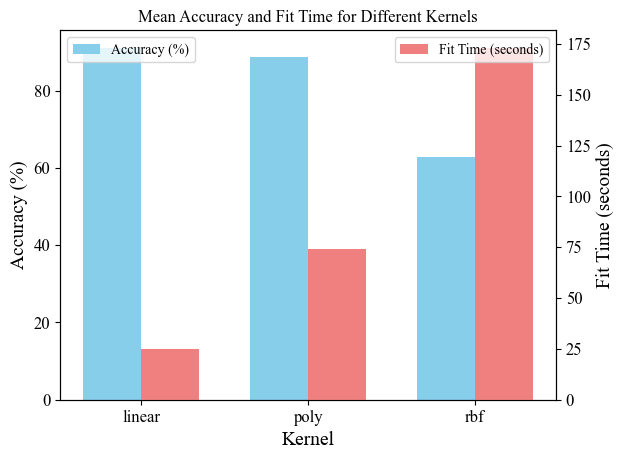

In [78]:
results = svc_search.cv_results_
kernel_fit_times = {}
kernel_accuracies = {}

for i, params in enumerate(results['params']):
    kernel = params['kernel']
    fit_time = results['mean_fit_time'][i]
    accuracy = results['mean_test_score'][i]
    if kernel in kernel_fit_times:
        kernel_fit_times[kernel].append(fit_time)
        kernel_accuracies[kernel].append(accuracy)
    else:
        kernel_fit_times[kernel] = [fit_time]
        kernel_accuracies[kernel] = [accuracy]


mean_fit_times = {kernel: np.mean(times) for kernel, times in kernel_fit_times.items()}
mean_accuracies = {kernel: np.mean(accs) * 100 for kernel, accs in kernel_accuracies.items()} 

kernels = list(mean_fit_times.keys())
fit_times = [mean_fit_times[kernel] for kernel in kernels]
accuracies = [mean_accuracies[kernel] for kernel in kernels]

x = np.arange(len(kernels))
width = 0.35
fig, ax1 = plt.subplots()

bars1 = ax1.bar(x - width/2, accuracies, width, label='Accuracy (%)', color='skyblue')

ax2 = ax1.twinx()
bars2 = ax2.bar(x + width/2, fit_times, width, label='Fit Time (seconds)', color='lightcoral')
plt.rcParams['font.family'] = 'Times New Roman'

ax1.set_xlabel('Kernel')
ax1.set_ylabel('Accuracy (%)')
ax2.set_ylabel('Fit Time (seconds)')
ax1.set_title('Mean Accuracy and Fit Time for Different Kernels')

ax1.set_xticks(x)
ax1.set_xticklabels(kernels)

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()

In [83]:
svc_search.cv_results_

{'mean_fit_time': array([ 24.99747658,  24.52768593,  24.80090408,  82.39968667,
        131.36160231, 227.46144271,  37.35832849,  43.6170887 ,
         75.49489427,  34.04872541,  35.44202209,  51.06462488,
         65.77588506,  98.39329305, 215.63564377,  33.16450558,
         41.62632442,  75.2984632 ,  30.7830646 ,  34.04081006,
         48.4619298 ,  60.6837605 ,  91.32568297, 209.89200854,
         35.54364734,  43.63108492,  77.30144043,  32.76202192,
         35.01393371,  49.65342803,  54.55468822, 231.91304331,
        269.55115538,  46.55425591, 229.90242734, 265.48960629,
         45.37348561, 215.36747665, 199.78109703]),
 'std_fit_time': array([ 0.48132375,  1.04940142,  0.70695305,  1.24326093,  2.7169839 ,
         3.23334936,  0.95469007,  0.38058241,  1.28138287,  1.2807002 ,
         0.59395451,  0.95566817,  1.86705852,  2.56342965,  2.09486527,
         0.98205833,  0.53166994,  1.30537399,  0.47582377,  0.93501608,
         0.64795996,  0.6181813 ,  2.01428088, 

In [51]:
svm_clf = SVC(kernel="linear", C=10)
svm_clf.fit(X_train_scaled, y_train)
y_pred_svc_linear = svm_clf.predict(X_test_scaled)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred_svc_linear)

0.9267

In [52]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

print(accuracy_score(y_test, y_pred_svc_linear) * 100)
print(precision_score(y_test, y_pred_svc_linear, average='weighted') * 100)
print(recall_score(y_test, y_pred_svc_linear, average='weighted')* 100)
print(f1_score(y_test,y_pred_svc_linear, average='weighted')* 100)

92.67
92.68614965272732
92.67
92.64952547784448


In [57]:
svm_clf = SVC(C = 5, coef0 = 0.1, degree= 2, kernel = 'poly')
svm_clf.fit(X_train_scaled, y_train)
y_pred_svc_poly = svm_clf.predict(X_test_scaled)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred_svc_poly)

0.9805

In [58]:
print(accuracy_score(y_test, y_pred_svc_poly) * 100)
print(precision_score(y_test,y_pred_svc_poly, average='weighted') * 100)
print(recall_score(y_test, y_pred_svc_poly, average='weighted')* 100)
print(f1_score(y_test,y_pred_svc_poly, average='weighted')* 100)

98.05
98.04989619121835
98.05
98.04911634204906


In [62]:
svm_clf = SVC( C = 10, gamma = 0.001, kernel = 'rbf')
svm_clf.fit(X_train_scaled, y_train)
y_pred_svc_rbf = svm_clf.predict(X_test_scaled)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred_svc_rbf)

0.9733

In [63]:
print(accuracy_score(y_test,y_pred_svc_rbf) * 100)
print(precision_score(y_test,y_pred_svc_rbf, average='weighted') * 100)
print(recall_score(y_test,y_pred_svc_rbf, average='weighted')* 100)
print(f1_score(y_test,y_pred_svc_rbf, average='weighted')* 100)

97.33000000000001
97.33542715871539
97.33000000000001
97.32960970858021
